## Instalación de librearias

In [9]:
# !python -m venv env 
# !python -m pip install --upgrade pip
# !pip install -r requirements.txt

## Grafico de una seña para cada clase

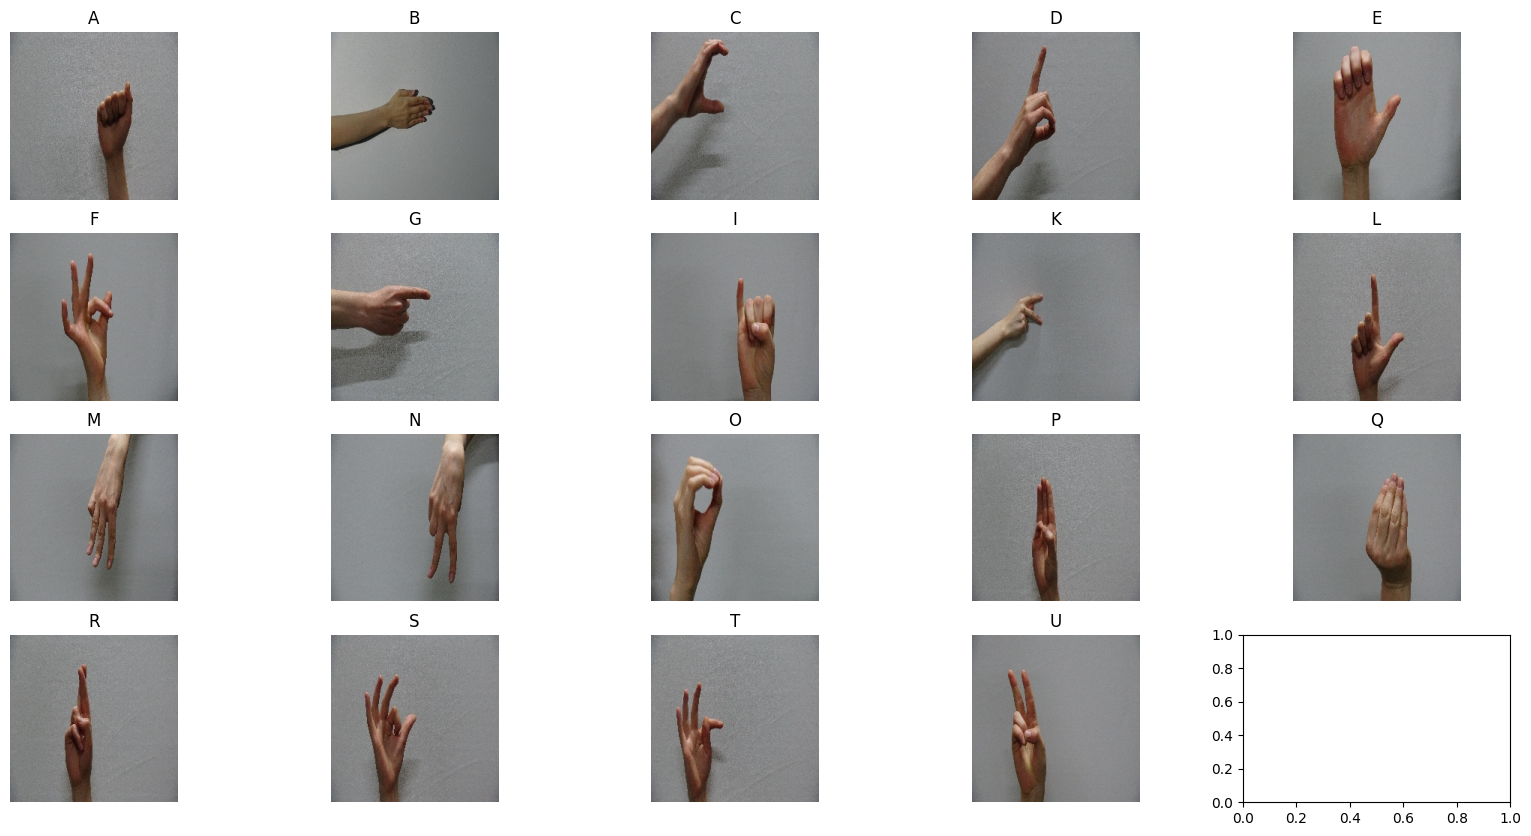

In [10]:
import matplotlib.pyplot as plt
import os
import random
from matplotlib import image as mpimg
import json

# Carga el diccionario que mapea nombres de clases a índices desde un archivo JSON
class_indices = json.load(open('class_indices.json'))

# Obtiene la lista de nombres de clases a partir de las claves del diccionario
classes = list(class_indices.keys())

# Crea una figura y un conjunto de ejes con un tamaño específico para mostrar las imágenes
fig, axes = plt.subplots(4, 5, figsize=(20, 10))

# Itera sobre las primeras 19 clases o menos (si hay menos de 19 clases en total)
for i in range(min(len(classes), 19)):
    class_name = classes[i]  # Obtiene el nombre de la clase en el índice actual
    img_name = random.choice(os.listdir(f'./classes/{class_name}'))  # Elige aleatoriamente el nombre de una imagen en la carpeta correspondiente a la clase
    img_path = f'./classes/{class_name}/{img_name}'  # Construye la ruta de la imagen seleccionada
    
    img = mpimg.imread(img_path)  # Lee la imagen desde el archivo en la ruta especificada
    
    # Muestra la imagen en los ejes correspondientes y establece el título como el nombre de la clase
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].set_title(class_name)
    axes[i // 5, i % 5].axis('off')  # Desactiva los ejes
    
# Muestra la figura que contiene las imágenes
plt.show()


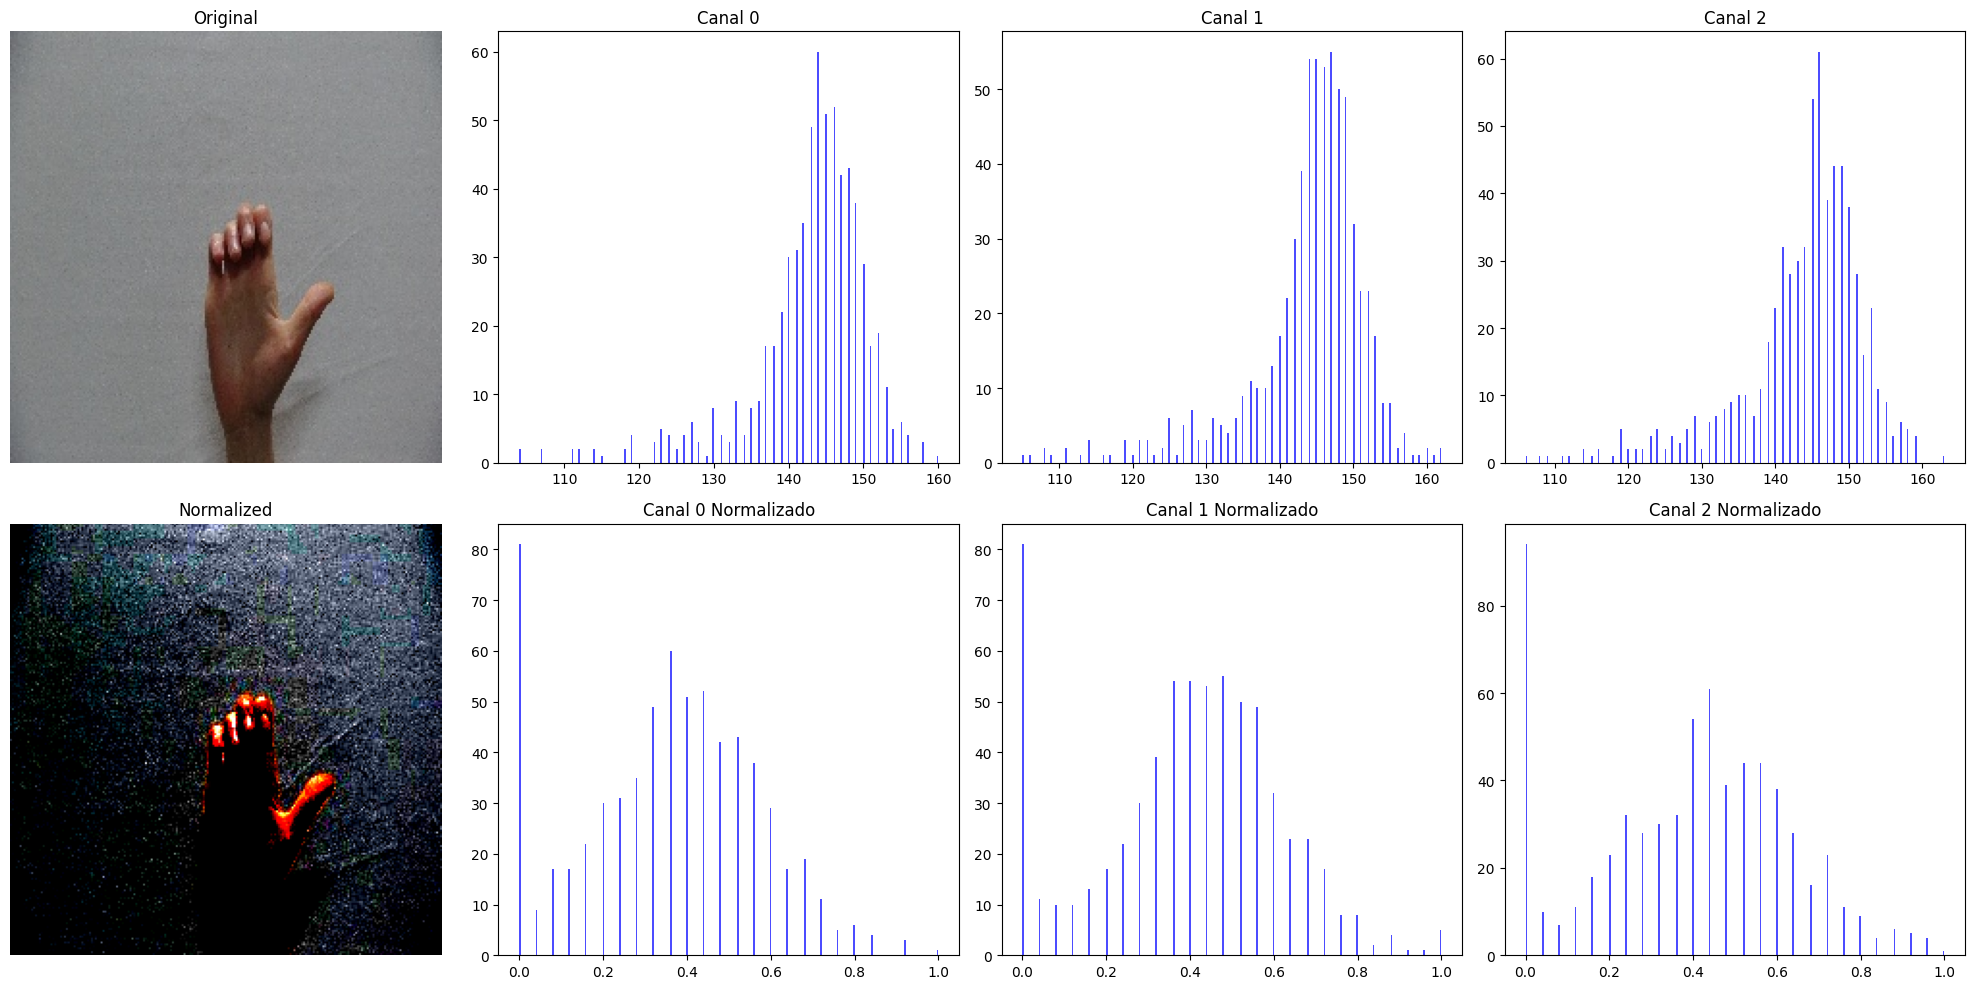

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definición de función para graficar histograma
def plot_histogram(ax, channel, title):
    ax.hist(channel.ravel(), bins=256, color='blue', alpha=0.7)
    ax.set_title(title)

img = cv2.imread("./classes/E/DSC02287.JPG") # Cargar la imagen
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Convertir de RGB a BGR

fig, axes = plt.subplots(2, 4, figsize=(20, 10)) # Crear una figura y un conjunto de ejes

axes[0, 0].imshow(img) 
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Graficar histogramas para cada canal de color
for i in range(3):
    channel = img[i]
    plot_histogram(axes[0, i + 1], channel, f'Canal {i}')

img_normalized = np.zeros_like(img, dtype=np.float32) # Crear una matriz para almacenar la imagen normalizada

channel = img / 255  # Normanizar la imagen dividiendo cada píxel por 255
channel_med = np.median(channel)  # Calcular la mediana
channel_std = np.std(channel)  # Calcular la desviación estándar

if channel_std > 0:
    img_normalized= (channel - channel_med) / channel_std # Normalizar la imagen utilizando la fórmula (x - media) / desviación estándar
else:
    img_normalized = 0 # Si la desviación estándar es cero, establecer todos los valores en cero

img_normalized = np.clip(img_normalized, 0, 1) # Asegurarse de que los valores estén en el rango [0, 1]

axes[1, 0].imshow(img_normalized)
axes[1, 0].set_title('Normalized')
axes[1, 0].axis('off')

# Graficar histogramas para cada canal de color normalizado
for i in range(3):
    channel_normalized = img_normalized[i]
    plot_histogram(axes[1, i + 1], channel_normalized, f'Canal {i} Normalizado')

plt.tight_layout()
plt.show()


## Normalizacion en tiempo real

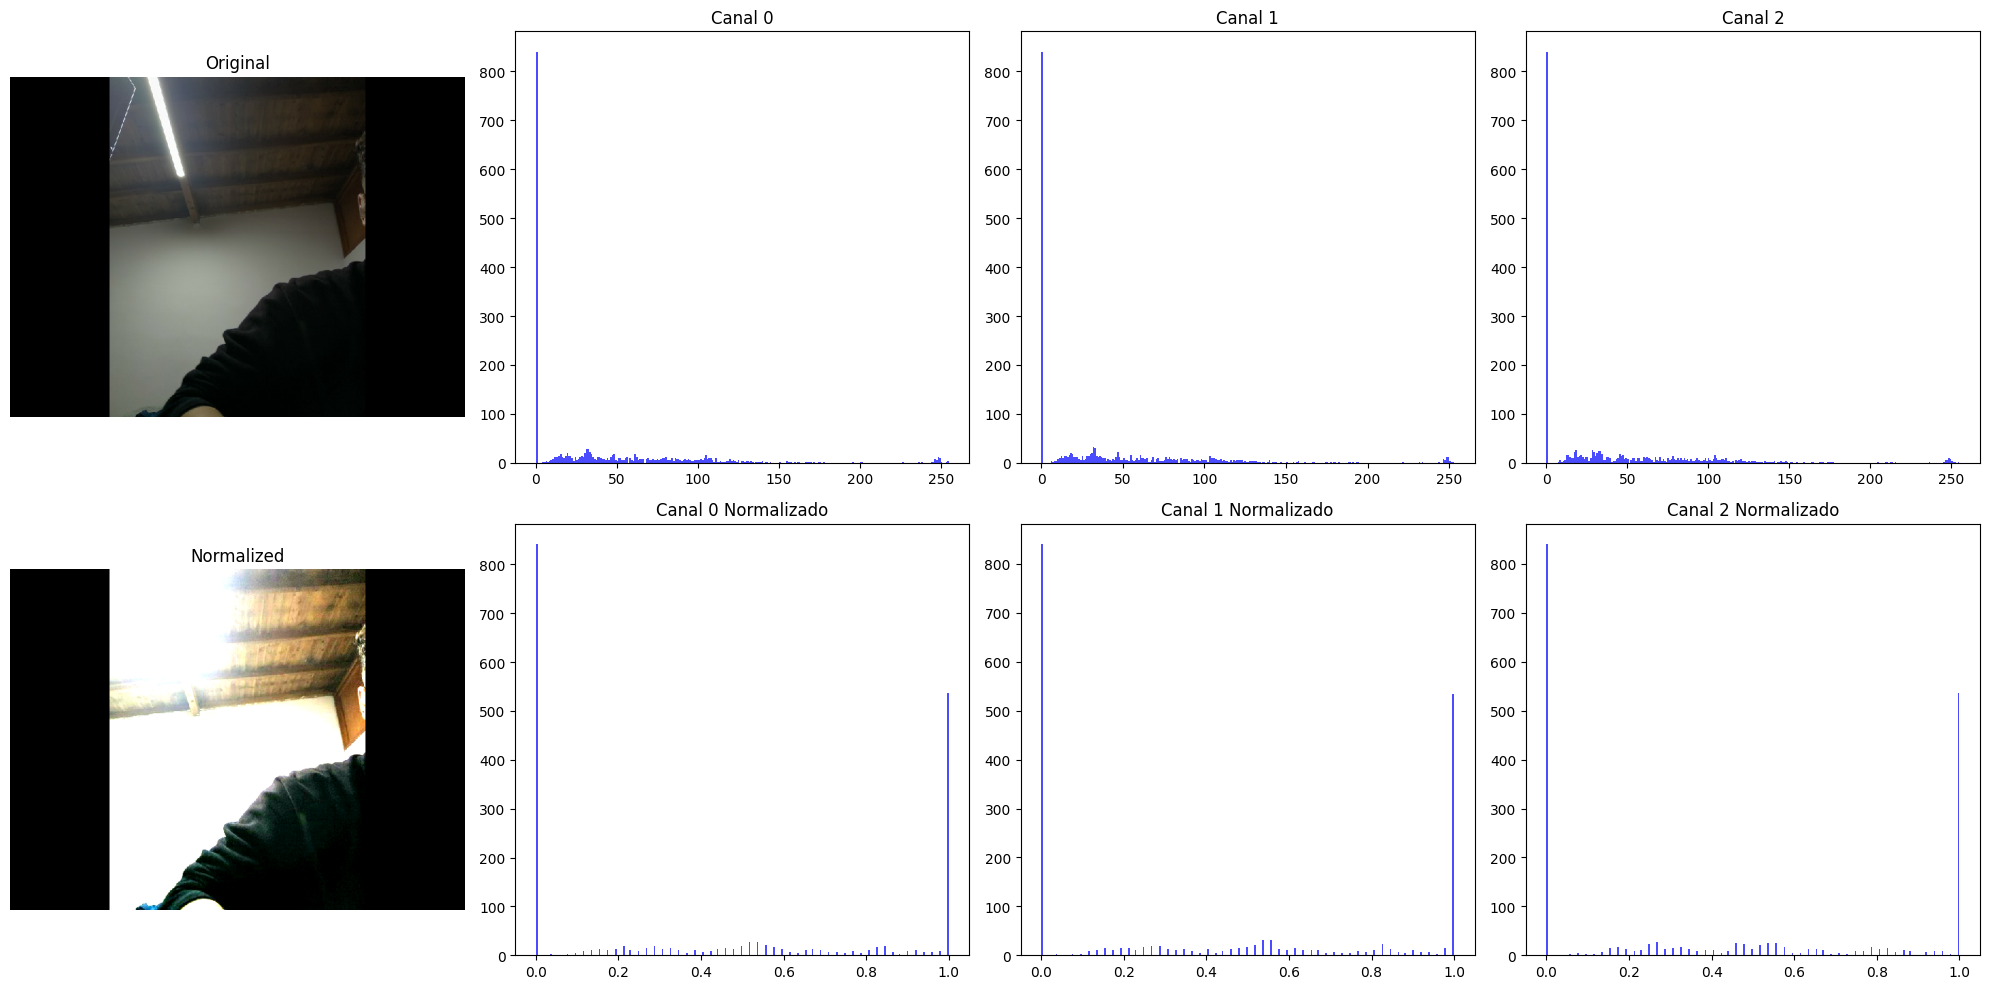

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Función para trazar histogramas
def plot_histogram(ax, channel, title):
    ax.hist(channel.ravel(), bins=256, color='blue', alpha=0.7)  # Trazar histograma usando matplotlib
    ax.set_title(title)  # Establecer el título del histograma

# Función para calcular histograma
def calculate_histogram(channel):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])  # Calcular el histograma utilizando OpenCV
    return hist

# Captura de video desde la cámara
cap = cv2.VideoCapture(0)

while True:  # Bucle principal para procesar cada fotograma
    _, frame = cap.read()  # Leer un fotograma de la cámara

    if frame is None:  # Si no se obtiene ningún fotograma, salir del bucle
        break

    frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convertir el fotograma de RGB a BGR

    # Normalizar la imagen
    frame_normalized = np.zeros_like(frame_, dtype=np.float32)

    channel = frame_ / 255  # Escalar los valores de los canales a [0, 1]
    channel_med = np.median(channel)  # Calcular el valor mediano
    channel_std = np.std(channel)  # Calcular la desviación estándar

    # Aplicar la fórmula de normalización
    if channel_std > 0:
        frame_normalized = (channel - channel_med) / channel_std
    else:
        frame_normalized = channel

    # Recortar los valores para que estén en el rango válido [0, 1] para la visualización
    frame_normalized = np.clip(frame_normalized, 0, 1)
    
    cv2.imshow("Frame", np.concatenate((channel, frame_normalized), axis=1))  # Mostrar el fotograma original y el convertido

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Esperar hasta que se presione 'q' para realizar más acciones
        
        # Crear una figura para mostrar los resultados
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))

        # Mostrar el fotograma original en la primera subfigura
        axes[0, 0].imshow(frame_)
        axes[0, 0].set_title('Original')
        axes[0, 0].axis('off')

        # Trazar histogramas antes de la normalización para cada canal de color
        for i in range(3):
            channel = frame_[i]
            plot_histogram(axes[0, i + 1], channel, f'Canal {i}')

        # Mostrar el fotograma normalizado en la segunda subfigura
        axes[1, 0].imshow(frame_normalized)
        axes[1, 0].set_title('Normalized')
        axes[1, 0].axis('off')

        # Trazar histogramas después de la normalización para cada canal de color
        for i in range(3):
            channel_normalized = frame_normalized[i]
            plot_histogram(axes[1, i + 1], channel_normalized, f'Canal {i} Normalizado')

        # Ajustar el diseño de la figura y mostrarla
        plt.tight_layout()
        plt.show()
        break  # Salir del bucle al finalizar la visualización y el procesamiento

# Liberar los recursos (cerrar la captura de video y las ventanas abiertas)
cap.release()
cv2.destroyAllWindows()

## Definición de los estimadores de pose

restarle a cada canart por separado la media del canal y dividir por la desviación estandar, garantizo ma media de o y desviacion estandar de 1

tener canal el grises
aumentar el tamaño de lo spuntos y grosor del as lineas 
adquirir criterios para seleccionar los parametros


## Crear Dataset de poses redimensionadas


In [3]:
import cv2
import mediapipe as mp
import numpy as np
import os
import time

# Función para dibujar los puntos de referencia de la mano y las conexiones entre ellos
def draw_hand_landmarks(frame, landmarks, COLOR):
    height, width, _ = frame.shape  # Obtiene las dimensiones del frame
    x_min, y_min, x_max, y_max = width, height, 0, 0  # Inicializa los límites del rectángulo que rodea la mano

    for i, point in enumerate(landmarks.landmark):
        x, y = int(point.x * width), int(point.y * height)  # Calcula las coordenadas del punto en píxeles
        color = (0, 255, 0) if i % 4 == 0 else (0, 0, 255)  # Alterna el color entre verde y rojo para cada punto
        cv2.circle(frame, (x, y), int(height * 0.01), color, -1)  # Dibuja un círculo en el punto

        # Actualiza las coordenadas mínimas y máximas para dibujar un rectángulo alrededor de la mano
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x)
        y_max = max(y_max, y)

    connections = [[0, 1], [1, 2], [2, 3], [3, 4], [0, 5],
                   [5, 6], [6, 7], [7, 8], [0, 9], [9, 10],
                   [10, 11], [11, 12], [0, 13], [13, 14], [14, 15],
                   [15, 16], [0, 17], [17, 18], [18, 19], [19, 20]]

    # Dibuja las conexiones entre los puntos de referencia de la mano
    for connection in connections:
        cv2.line(frame, (int(landmarks.landmark[connection[0]].x * width), int(landmarks.landmark[connection[0]].y * height)),
                         (int(landmarks.landmark[connection[1]].x * width), int(landmarks.landmark[connection[1]].y * height)), COLOR, 2)

    # Retorna el frame con los puntos de referencia de la mano y los límites del rectángulo que rodea la mano
    return frame, (x_min-15, y_min-15, x_max+15, y_max+15)

# Función para capturar frames de la cámara y guardarlos en carpetas correspondientes a cada letra
def capture_frames(period, folder, num_frames):
    # Crea la carpeta principal si no existe
    if not os.path.exists(folder):
        os.makedirs(folder)

    letters = ["A", "B", "C", "D", "E", "F", "G", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U"]

    # Crea subcarpetas para cada letra del alfabeto
    for letter in letters:
        letter_folder = os.path.join(folder, letter)
        if not os.path.exists(letter_folder):
            os.makedirs(letter_folder)

    cap = cv2.VideoCapture(0)  # Inicializa la cámara
    count = 0  # Contador para capturar frames
    letter_idx = 0  # Índice de la letra actual
    frames_taken = 0  # Contador para el número de frames tomados por letra

    while True:
        ret, frame = cap.read()  # Lee un frame de la cámara

        # Si no se pudo leer el frame, termina el ciclo
        if not ret:
            print("Error al leer el frame")
            break

        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convierte el frame de BGR a RGB

        hands_results = hands.process(img)  # Procesa el frame con el modelo de manos
        black_frame = np.zeros_like(frame)  # Crea una imagen negra del mismo tamaño que el frame

        # Dibuja puntos y líneas para las manos en la imagen negra
        if hands_results.multi_hand_landmarks:
            for landmarks in hands_results.multi_hand_landmarks:
                drawn_frame, hand_rect = draw_hand_landmarks(frame, landmarks, (0, 0, 255))  # Dibuja puntos y líneas para las manos
                # Guarda el frame en la carpeta correspondiente
                if count % period == 0 and frames_taken < num_frames:
                    letter = letters[letter_idx]  # Obtiene la letra actual
                    letter_folder = os.path.join(folder, letter)  # Obtiene la carpeta correspondiente a la letra
                    try: 
                        frame_resized = cv2.resize(drawn_frame[hand_rect[1]:hand_rect[3], hand_rect[0]:hand_rect[2]], (512, 512))  # Redimensiona el frame
                        cv2.imwrite(os.path.join(letter_folder, f"{time.time()}.jpg"), cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY))  # Guarda el frame en la carpeta
                        frames_taken += 1  # Incrementa el contador de frames tomados por letra
                        count = 0  # Reinicia el contador
                    except: 
                        pass
                if frames_taken >= num_frames:
                    frames_taken = 0  # Reinicia el contador de frames tomados por letra
                    letter_idx = (letter_idx + 1) % len(letters)  # Cambia a la siguiente letra
                count += 1

        cv2.putText(frame, f'Letra: {letters[letter_idx]}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)  # Muestra la letra actual
        cv2.putText(frame, f'Capturas: {frames_taken}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)  # Muestra el número de frames tomados
        cv2.imshow('Pose Detection', frame)  # Muestra el frame con las manos detectadas
        
        # Si se presiona la tecla 'q', termina el ciclo
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release() # Liberar la cámara
    cv2.destroyAllWindows() # Cerrar todas las ventanas
    hands.close() # Cerrar el modelo de manos

mp_hands = mp.solutions.hands # Importar el modelo de manos de MediaPipe
hands = mp_hands.Hands() # Inicializar el modelo de manos

capture_frames(15, "classes_poses_cut", 100) # Capturar frames cada 15 frames y guardar 100 frames por letra en la carpeta "classes_poses_cut"
